In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
temp = []

phimuls = [-2.0, -1.0, -0.5, -0.25, 0, 0.5]
for phi_mul in phimuls:
    f = open(f"./outputs/TS_wmod1_500_bins_30_psrs_{phi_mul}_phi_fac.txt", 'r')
    temp.append(f.read().split('\n'))

In [3]:
temp

[['1.668376548024334e-10', '0.0', '2.434368873543098e-42', ''],
 ['1918.3594476620551', '6.691901049953677', '9.615746001432076e-30', ''],
 ['14193.350559410881', '25.199417152740008', '3.9774030240580365e-29', ''],
 ['17824.994956650786', '29.311698992710884', '4.630902801799756e-29', ''],
 ['44502.207134944125', '67.18363655436073', '8.089243486805954e-29', ''],
 ['126107.49151083198', '143.49228820439498', '2.0151357338155502e-28', '']]

In [4]:
tsmax = []
small_f = []
phio = []
phio_const = [(10**i) * 4.98e-27 for i in phimuls]  #[4.98e-29, 4.98e-28, 10**-0.75 * 4.98e-27, 10**-0.5 * 4.98e-27, 4.98e-27, 10**0.5 * 4.98e-27, 4.98e-26]
phio_const_norm = [i /4.98e-27 for i in phio_const]
for i in temp:
    tsmax.append(float(i[0]))
    small_f.append(float(i[1]))
    phio.append(float(i[2]))

In [5]:
np.sqrt(tsmax)

array([1.29165651e-05, 4.37990804e+01, 1.19135849e+02, 1.33510280e+02,
       2.10955462e+02, 3.55116166e+02])

In [6]:
phio_const

[4.98e-29,
 4.98e-28,
 1.5748142747638528e-27,
 2.8004597994479382e-27,
 4.98e-27,
 1.574814274763853e-26]

In [7]:
np.sqrt(tsmax[1])

43.79908044311039

In [8]:
phio_const = np.array(phio_const)/(1e-9)

In [20]:
np.array(phio)/(1e-9)

array([2.43436887e-33, 9.61574600e-21, 3.97740302e-20, 4.63090280e-20,
       8.08924349e-20, 2.01513573e-19])

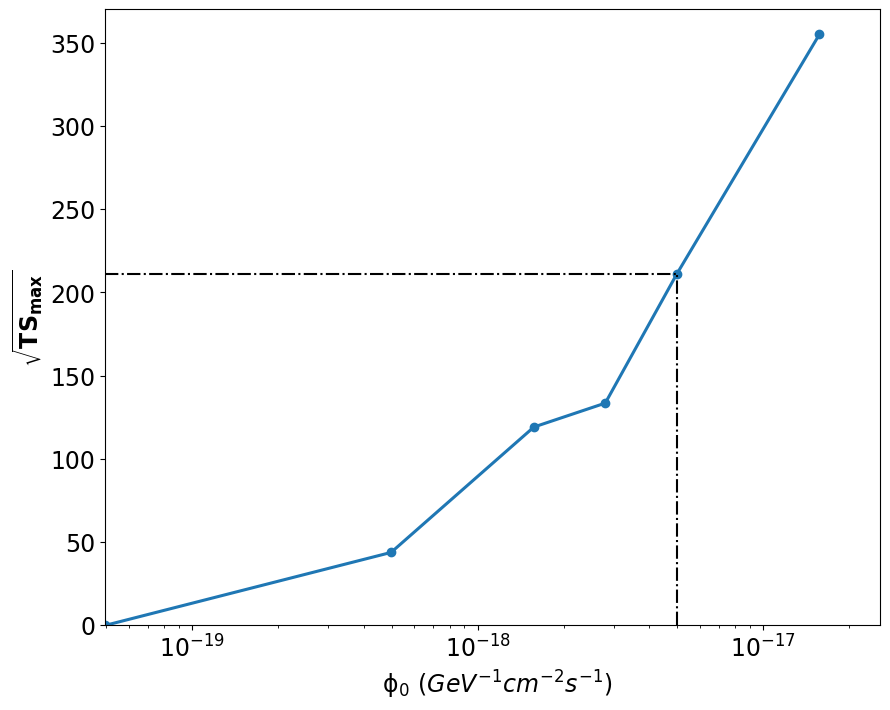

In [9]:
plt.figure(figsize=(10, 8))
axesfont = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 17,
        }
font = {'family': 'serif',
        'size': 22,
        'weight': 'bold',
        'color':  'black',
        }


plt.plot(phio_const, np.sqrt(tsmax), lw=2.2, ls='-')
plt.hlines(np.sqrt(tsmax[4]), phio_const[0], 4.98e-18, colors='k', linestyles='-.')
plt.vlines(4.98e-18, 0, np.sqrt(tsmax[4]), colors='k', linestyles='dashed', label='$\phi_0$ = 4.98e-18 $GeV^{-1} cm^{-2} s^{-1}$\n$\Gamma=-2.53$', ls='-.')
plt.scatter(phio_const, np.sqrt(tsmax))
# plt.plot(small_f, tsmax)
# plt.xlim(4.98e-27)
plt.ylabel('$\mathbf{\sqrt{TS_{max}}}$', fontdict=axesfont)
plt.xlabel(' $\mathsf{\phi_0}$ $(GeV^{-1} cm^{-2} s^{-1})$', fontdict=axesfont)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

plt.xlim(phio_const[0], phio_const[-1] + 1e-17)
plt.ylim(0, max(np.sqrt(tsmax)) + 15)

plt.xscale('log')
# plt.legend()
# plt.title('$\mathbf{\sqrt{TS_{max}}}$ vs $\mathsf{\phi_0}$', fontdict=font)
plt.savefig('./outputs/TSmax_phio_const.pdf', facecolor='w')
plt.show()


In [10]:
phio_const

array([4.98000000e-20, 4.98000000e-19, 1.57481427e-18, 2.80045980e-18,
       4.98000000e-18, 1.57481427e-17])

In [11]:
tsmax

[1.668376548024334e-10,
 1918.3594476620551,
 14193.350559410881,
 17824.994956650786,
 44502.207134944125,
 126107.49151083198]

In [12]:
# find phio for which sqrt(tsmax) = 5 by interpolation/extrapolation

from scipy.interpolate import interp1d

f = interp1d(phio_const, np.sqrt(tsmax), kind='cubic')

In [13]:
for x in np.linspace(4.98e-20, 1e-17, 100000):
    if f(x) >= 5:
        print(x)
        break

9.96510005100051e-20


In [14]:
# find phio for which sqrt(tsmax) = 5 by extrapolation
f = interp1d(phio_const[1:], np.sqrt(tsmax[1:]),  kind='cubic', fill_value='extrapolate')

In [15]:
for x in np.linspace(4.98e-20, 1e-17, 100000):
    if f(x) >= 5:
        print(x)
        break

2.248257682576826e-19


In [16]:
yyy = np.sqrt(tsmax[1:3])
xxx = np.log(phio_const[1:3])

m = (yyy[1] - yyy[0])/(xxx[1] - xxx[0])

In [17]:
#5 - yyy[0] = m * (x - xxx[0])
xxxx = (5 - yyy[0])/m + xxx[0]
np.exp(xxxx)

2.752485659732759e-19

/tmp/ipykernel_96735/1178046136.py:15: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 1)


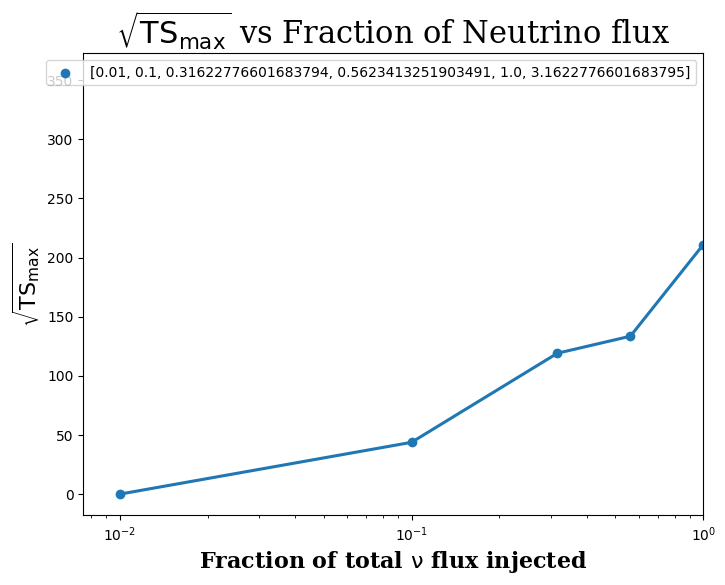

In [14]:
plt.figure(figsize=(8, 6))
axesfont = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 16,
        }
font = {'family': 'serif',
        'size': 22,
        'color':  'black',
        }
plt.plot(phio_const_norm, np.sqrt(tsmax), lw=2.2)
plt.scatter(phio_const_norm, np.sqrt(tsmax), label=phio_const_norm)
# plt.plot(small_f, np.array(tsmax), lw=2.2)
plt.xscale('log')
plt.xlim(0, 1)
plt.ylabel('$\mathsf{\sqrt{TS_{max}}}$', fontdict=axesfont)
plt.xlabel('Fraction of total $\mathsf{\u03BD}$ flux injected', fontdict=axesfont)
plt.title('$\mathsf{\sqrt{TS_{max}}}$ vs Fraction of Neutrino flux', fontdict=font)
plt.savefig('./outputs/TSmax_small_f.pdf', facecolor='w')
plt.legend()
plt.show()


In [21]:
import pickle
 
dadada = pickle.load(open('./pickle/all_TSS_wmod1_500_bins_30_psrs_0_phi_fac_smeared.pkl', 'rb'))

In [25]:
len(dadada[2])
phio = np.logspace(-48, -26, 1000)

In [34]:
from core.stacking_analysis import dfde

1e28 * dfde(1e14, -2.53, 1) *phio[np.nanargmax(dadada[2])] /1e9

8.089243486805954e-10

In [30]:
np.sqrt(dadada[2][np.nanargmax(dadada[2])])

210.95546244395788

In [33]:
phio[np.argmax(dadada[2])]

3.6271002523306484e-27

from core.req_arrays import *
from core.signal_bag import hvovec

msra = msra[np.abs(msdec) < 85]
msdec = msdec[np.abs(msdec) < 85]

len(msra[msra < 150])

np.roll(msra, -1)[:-1]

angles_less_than_5 = []
lens = 0
for i in range(len(msra)):
    # for j in range(i+1, len(msra)):
        temp = np.abs(hvovec(msra[i], msdec[i], np.roll(msra, -i)[:-i], np.roll(msdec, -i)[:-i]))
        temp2 = len(temp[temp <= 5])
        lens += temp2
        angles_less_than_5.append(temp[temp <= 5])
        

lens

3387 * 3386 /2

len(msra)

import pickle
from numba import prange

from core.req_arrays import *
from core.stacking_analysis import *
import scipy.interpolate as interp

all_TSS_wmod1 = pickle.load(open('./pickle/all_TSS_wmod1_500_bins_30_psrs_-1.0_phi_fac_smeared.pkl', 'rb'))

len(all_TSS_wmod1[0])

gamma_arr = np.array([-2, -2.2, -2.53, -3])

phio = np.logspace(-48, -26, 1000)
all_e_UL = []
e_decade = [1e13, 1e14, 1e15, 1e16, 1e17]
for e_UL in e_decade:
    e2dfde = []

    for gamma in prange(len(gamma_arr)):
        temp = []
        for phi in range(len(phio)):
            temp.append( e_UL**2 * dfde(e_UL, gamma_arr[gamma], phio[phi]))        #in eV
        e2dfde.append(temp)
    e2dfde = np.asarray(e2dfde)

    all_e_UL.append(e2dfde)
mark = ['^', 'o', 's', 'd']


for g in range(3):
    print(phio[np.argmax(all_TSS_wmod1[g])]) 


all_UL = []

for gamma in prange(len(gamma_arr)):
    temp = []
    for i in all_e_UL:
        dist_g = interp.interp1d(all_TSS_wmod1[gamma], i[gamma]/1e9)
        temp.append(dist_g(-3.84))

        
    all_UL.append(temp)
e2dfde = np.asarray([1e28 * dfde(1e14, g, 1) * phio for g in gamma_arr])
# plt.style.use('default')
font = {'family': 'serif',
        'weight': 'bold',
        'size': 22,
        'color':  'black',
        }
smallerfont = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 15,
        }

axesfont = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 17,
        }

fig, axs = plt.subplots(1,1, figsize=(7, 6))

for gamma in [ 1, 2, 3]:#range(4):
    
    axs.plot(1e28 * dfde(1e14, gamma_arr[gamma], 1) *phio /1e9, all_TSS_wmod1[gamma], label='$\Gamma$ = ' + str(gamma_arr[gamma]), lw=2.2)# + ' with wt')    #in GeV
    # axs.vlines(1e19*phio[np.nanargmax(all_TSS_wmod1[gamma])], -1e7, 90,lw=2.2, label='95 % UPPER LIMIT $TS = -3.84$')
    # print(1e19*phio[np.nanargmax(all_TSS_wmod1[gamma])])
    

axs.set_title('Weighting scheme:  $\mathsf{\mathbf{w_{model} = 1}}$', fontdict=smallerfont)


# for i in range(3):
    
axs.legend(prop={'size':14}, framealpha=0, loc='lower left')
axs.hlines(-3.84, 1e-20, 1e-5, linestyles='dashed', lw=2.2, ls='-.', label='95 % UPPER LIMIT $TS = -3.84$', color='lightcoral')
axs.set_xscale('log')
axs.set_xlabel('$\mathsf{\mathbf{E^2_{\u03BD} \dfrac{dF}{dE_{\u03BD}}}}$ at 100 TeV ($\mathsf{\mathbf{GeV}}$ $\mathsf{\mathbf{s^{-1}}}$ $\mathsf{\mathbf{cm^{-2}}}$ )', fontdict=axesfont)
axs.set_ylabel('TS', fontdict=axesfont, fontsize=20)
axs.xaxis.set_tick_params(labelsize=15)
axs.yaxis.set_tick_params(labelsize=15)

# axs.set_ylim(-20, 6)
axs.set_xlim(0.95e-19, 1e-6)

plt.suptitle('TS vs Total Neutrino Flux at 100 TeV', fontweight='bold', fontsize=20, fontfamily='serif')

plt.tight_layout()
# plt.savefig(f'outputs/TS_vs_E2dfde_all_w_model_bins={len(enus)}_C_wt_all_psr_wmod1_cone_{cone_deg}.pdf')
# # plt.show()
# print(f'\nTS_vs_E2dfde_all_w_model_bins={len(enus)}_C_wt_all_psr_wmod1_cone_{cone_deg}.pdf\nDONE')
plt.show()

#SIMILAR PLOTS FOR 95% UPPER LIMIT 
fig, axs = plt.subplots(1, 1, figsize=(7, 6))




for gamma in range(1, len(gamma_arr)):

    axs.plot(np.divide(e_decade, 1e9), np.multiply(all_UL[gamma], 3), label='$\Gamma$ = ' + str(gamma_arr[gamma]), lw=2.2, ls='-')# + ' with wt')    #in GeV

    
axs.set_xscale('log')
axs.set_yscale('log')
axs.set_xlabel('E$_{\u03BD}$ (GeV)', fontdict=axesfont)
axs.set_ylabel('$\mathsf{\mathbf{E^2_{\u03BD} \dfrac{dF}{dE_{\u03BD}}}}$ at 100 TeV ($\mathsf{\mathbf{GeV}}$ $\mathsf{\mathbf{s^{-1}}}$ $\mathsf{\mathbf{cm^{-2}}}$ )', fontdict=axesfont)
axs.xaxis.set_tick_params(labelsize=15)
axs.yaxis.set_tick_params(labelsize=15)

axs.legend(prop={'size':14}, framealpha=0, loc='lower left')


axs.set_title('Weighting scheme:  $\mathsf{\mathbf{w_{model} = 1}}$', fontdict=smallerfont)


plt.suptitle('95% UL of Total Energy Flux vs Neutrino Energy', fontweight='bold', fontsize=20, fontfamily='serif')
plt.tight_layout()
# plt.savefig(f'outputs/UL_all_w_model_bins={len(enus)}_C_wt_all_psr_wmod1_cone_{cone_deg}.pdf')
plt.show()


for i in all_TSS_wmod1:
    print(max(i), np.argmax(i), 1e19 * np.logspace(-38, -26, 1000)[np.argmax(i)])


print('#'*100)
print('#'*100)


all_UL[1]

ul_wmod1 = pickle.load(open("outputs/UL_ALL_wmodel1.txt", 'rb'))
ul_wd_ws = pickle.load(open("outputs/UL_ALL_wd_ws0.txt", 'rb'))

np.shape(ul_wmod1)

print(3*ul_wmod1[2][1])
print(3*ul_wd_ws[0][2][1])
print(3*ul_wd_ws[1][2][1])